In [1]:
#Loading the cleaned training and validation data
import pandas as pd
X_train = pd.read_csv("cleaned_data/X_train.csv").values
X_val = pd.read_csv("cleaned_data/X_val.csv").values

y_train = pd.read_csv("cleaned_data/y_train.csv").values.ravel()
y_val = pd.read_csv("cleaned_data/y_val.csv").values.ravel()

In [2]:
# Force CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#import tensorflow libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

2025-11-09 16:26:32.030978: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 16:26:32.062695: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-09 16:26:32.687286: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
#Defining the architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

2025-11-09 16:26:33.209222: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-11-09 16:26:33.209240: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:160] env: CUDA_VISIBLE_DEVICES="-1"
2025-11-09 16:26:33.209243: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-11-09 16:26:33.209245: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-11-09 16:26:33.209247: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: taming3joy-computer
2025-11-09 16:26:33.209249: I external/local_xla/xla/stream_executo

In [ ]:
#Compiling the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Training the model
history = model.fit(
    X_train,y_train,
    validation_data = (X_val,y_val),
    epochs = 100,
    batch_size = 32,
    verbose=1
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4505 - auc: 0.4761 - loss: 0.7210 - val_accuracy: 0.5312 - val_auc: 0.5542 - val_loss: 0.6840
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5631 - auc: 0.5319 - loss: 0.6818 - val_accuracy: 0.6875 - val_auc: 0.6198 - val_loss: 0.6561
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6177 - auc: 0.5931 - loss: 0.6565 - val_accuracy: 0.6875 - val_auc: 0.6906 - val_loss: 0.6362
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6553 - auc: 0.6529 - loss: 0.6369 - val_accuracy: 0.7031 - val_auc: 0.7312 - val_loss: 0.6182
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - auc: 0.7001 - loss: 0.6201 - val_accuracy: 0.6875 - val_auc: 0.7583 - val_loss: 0.6006
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - auc: 0.7306 - loss: 0.6054 - val_accuracy: 0.7031 - val_auc: 0.7865 - val_loss: 0.5862
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [6]:
pd.DataFrame(history.history)

,accuracy,auc,loss,val_accuracy,val_auc,val_loss
0,0.450512,0.476067,0.721019,0.531250,0.554167,0.684049
1,0.563140,0.531886,0.681839,0.687500,0.619792,0.656104
2,0.617747,0.593139,0.656489,0.687500,0.690625,0.636153
3,0.655290,0.652872,0.636938,0.703125,0.731250,0.618150
4,0.686007,0.700115,0.620126,0.687500,0.758333,0.600593
...,...,...,...,...,...,...
95,0.832765,0.911971,0.382699,0.781250,0.776042,0.587607
96,0.839590,0.912445,0.381167,0.781250,0.769792,0.588764
97,0.829352,0.915661,0.379430,0.781250,0.772917,0.588770
98,0.825939,0.915786,0.378456,0.796875,0.772396,0.588875


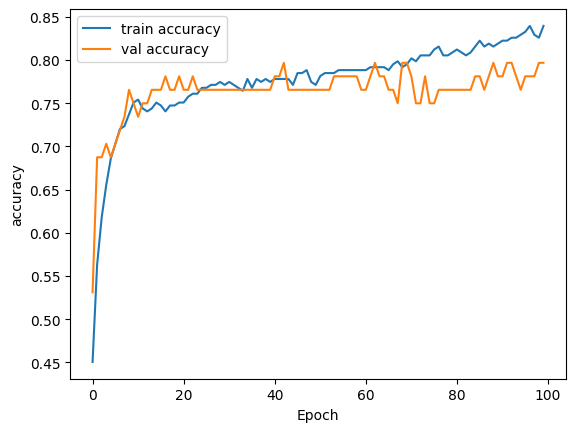

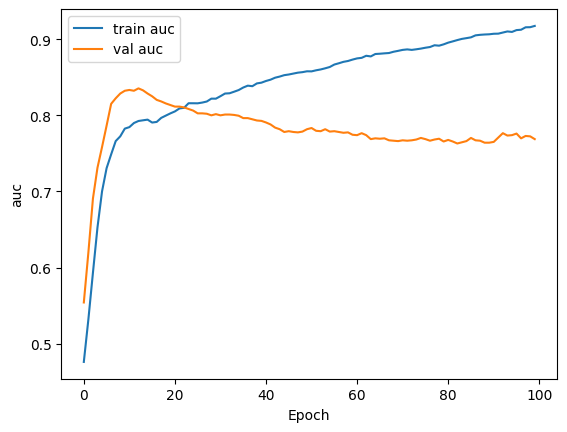

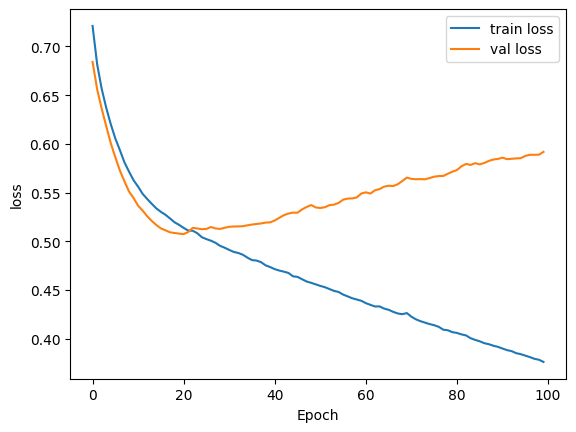

In [7]:
#Seeing how the metrics change for each epoch
import matplotlib.pyplot as plt
metrics = ["accuracy","auc","loss"]
for metric in metrics:
    plt.plot(history.history[metric], label=f"train {metric}")
    plt.plot(history.history[f"val_{metric}"], label=f"val {metric}")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.show()

In [8]:
#Saving the model to memory to reuse without retraining
model.save("models/initial_model.keras")